The Goal of this notebook is simply to ensure that environment is setup correctly.

**Resources**

* [MNIST (Medium Article)](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
* [Official Pytorch MNIST](https://github.com/pytorch/examples/tree/master/mnist)

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [10]:
BATCH_SIZE=16

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # need to check why this is done. 
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, shuffle=False, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(dataset2, shuffle=False, batch_size=BATCH_SIZE)


**Show Some Data**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


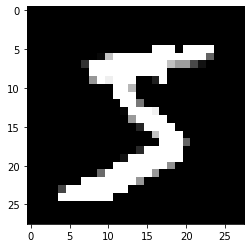

In [8]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [11]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([16, 1, 28, 28])
Image label dimensions: torch.Size([16])
